<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [71]:
import pandas as pd # импортируем библиотеки

import math

import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep = "\t") # считываем данные, указываем требуемый разделитель

data.info() # оцениваем данные

display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Глядя на информацию по данным, можно увидеть, что всего в нашем распоряжении 23699 объявлений. Команда info дала нам информацию о каждом столбце в таблице, рассмотрим их подробнее:

1) total_images  - пропущенных значений нет, есть нули, но это не проблема 

2) last_price  - здесь тоже пропусков нету

3) total_area - аналогично, пропусков нет

4) first_day_exposition - всё так же, нету пропусков, но надо перевести данные в дату, причём округлить до дней

5) rooms - и здесь нету пропусков

6) ceiling_height - здесь довольно много пропусков, видимо не все указывают высоту потолков. Восстановить эту информацию крайне проблематично, к тому же она нам не сильно нужна. Поступим следующим образом: Заменим все NaN на специальное значение, чтобы при работе с данным столбцом не учитывать эти значения

7) floors_total - количество этажей в доме. В случаях, когда он не указан (а их немного) можно считать, что квартира, которая продаётся по объявлению в этом доме не будет находится на последнем этаже, иначе бы данный параметр обязательно бы указали. Для определённости также заменим на специальное значение, которые не учтём в расчётах. Надо перевести в int

8) living_area - жилая площадь. Здесь уже можно попробовать восстановить данные путём замены NaN на среднее значение по данному количеству комнат

9) floor - здесь всё в порядке на первый взгляд

10) is_apartment - очень много пропусков, скорее всего если нету значения - значит не аппартаменты. Потом надо перевести в bool

11) studio - здесь всё в порядке

12) open_plan - данные на месте

13) kitchen_area - данных немного не хватает, можно поступить таким же путём с заменой на среднее значение, но если не указана площадь кухни и метраж квартиры - то надо будет убирать такие данные

14) balcony  - если не указано, то скорее всего нету. Значит, заменим на 0. Переведём в int

15) locality_name - Если нету, то запишем как unknown

16) airports_nearest - если не указано, будем считать что их нету (поставим большую величину для категоризации)

17) cityCenters_nearest - если не указано, будем считать что их нету (поставим большую величину для категоризации)

18) parks_around3000 - если не указано, значит считаем что нет (заменим на ноль) и переведём в int

19) parks_nearest - если нету, значит укажем большую величину для категоризации

20) ponds_around3000 - если не указано, значит считаем что нет (заменим на ноль) и переведём в int

21) ponds_nearest - если нету, значит укажем большую величину для категоризации

22) days_exposition - при категоризации можем указать минимальное значение вместо пропусков, переведём в int

## Предобработка данных

In [72]:
data["ceiling_height"] = data["ceiling_height"].fillna(0) # заменяем пропуски на специальное значение для отсеивания при оценке

data["floors_total"] = data["floors_total"].fillna(0) # заменяем на специальное значение

data['is_apartment'] = data['is_apartment'].fillna(False)

data['balcony'] = data['balcony'].fillna(0)

data['locality_name'] = data['locality_name'].fillna('unknown')

data['airports_nearest'] = data['airports_nearest'].fillna(1000000) # заменяем на специальное значение

data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(1000000) # заменяем на специальное значение

data['parks_around3000'] = data['parks_around3000'].fillna(0)

data['parks_nearest'] = data['parks_nearest'].fillna(1000000) # заменяем на специальное значение

data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

data['ponds_nearest'] = data['ponds_nearest'].fillna(1000000) # заменяем на специальное значение

data['days_exposition'] = data['days_exposition'].fillna(0) # заменяем на специальное значение

# переведём значения в нужный нам тип данных 

data["first_day_exposition"] = data["first_day_exposition"].astype('datetime64') 

data["floors_total"] = data["floors_total"].astype('int')

data["is_apartment"] = data["is_apartment"].astype('bool')

data["balcony"] = data["balcony"].astype('int')

data["parks_around3000"] = data["parks_around3000"].astype('int')

data["ponds_around3000"] = data["ponds_around3000"].astype('int')

data["days_exposition"] = data["days_exposition"].astype('int')

# теперь заполним определёнными значениями те пропуски, где это возможно

# сначала посмотрим на те строки, где отсутствует и площадь кухни и жилая площадь

display(data[(data['living_area'].isna()) & (data['kitchen_area'].isna())])

# в таких заявках будет некорректно вычислять оба этих параметра, всего таких заявок около 6%, что допустимо отбросить
data.drop(labels = data[(data['living_area'].isna()) & (data['kitchen_area'].isna())].index,axis = 'index',inplace = True)

# теперь можем заполнить пропуски 

# Выделим категории для параметров - 5 типов для комнат (1,2,3,4 и больше)
# Будем использовать такие параметры как является ли это апартаментами, является ли это студией
# 4 типа по размерам жил. площади и 4 типа по размерам кухни.

# определим функции для введение категорий на размеры кухни и жилой площади
def kitchensize(size):
    if math.isnan(size):
        return float('NaN')
    if size<= 5:
        return "маленькая"
    if size<= 10:
        return "средняя"
    if size<= 15:
        return "больше средней"
    return "большая"

def livingsize(size):
    if math.isnan(size):
        return float('NaN')
    if size<= 17.5:
        return "маленькая"
    if size<= 30:
        return "средняя"
    if size<= 50:
        return "больше средней"
    return "большая"

# создадим списки для прохождения цикла

kitchen_size = ["маленькая","средняя","больше средней", "большая"]

living_size = ["маленькая","средняя","больше средней", "большая"]

# сделаем первичную категоризацию

data['kitchensize'] = data['kitchen_area'].apply(kitchensize)

data['livingsize'] = data['living_area'].apply(livingsize)

# Создадим список средних значений

list_of_kitsize = []

list_of_livsize = []

for kit_size in kitchen_size:
    list_of_kitsize.append(data[data['kitchensize'] == kit_size]['kitchen_area'].mean())

for liv_size in living_size:
    list_of_livsize.append(data[data['livingsize'] == liv_size]['living_area'].mean())

    
# создадим series для удобства замены NaN

list_of_kitsize = pd.Series(data =list_of_kitsize ,index = kitchen_size)

list_of_livsize = pd.Series(data =list_of_livsize ,index = living_size)

# делаем замену NaN на средние

for kit_size in kitchen_size:
     data[data['kitchensize']==kit_size] = data[data['kitchensize']==kit_size].fillna(list_of_livsize[kit_size])
        
for liv_size in living_size:
     data[data['livingsize']==liv_size] = data[data['livingsize']==liv_size].fillna(list_of_kitsize[liv_size])

# Теперь все пропуски заполнены 

data['kitchensize'] = data['kitchen_area'].apply(kitchensize) # исправляем последние два столбца

data['livingsize'] = data['living_area'].apply(livingsize)

data.info()

display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24,3,0.00,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
30,12,2200000.0,32.8,2018-02-19,1,0.00,9,NaN,2,False,...,NaN,0,Коммунар,1000000.0,1000000.0,0,1000000.0,0,1000000.0,63
37,10,1990000.0,45.8,2017-10-28,2,2.50,5,NaN,1,False,...,NaN,0,поселок городского типа Красный Бор,1000000.0,1000000.0,0,1000000.0,0,1000000.0,196
44,13,5350000.0,40.0,2018-11-18,1,0.00,22,NaN,3,False,...,NaN,1,Санкт-Петербург,30471.0,11603.0,1,620.0,1,1152.0,0
59,15,6300000.0,46.5,2017-03-06,1,0.00,13,NaN,13,False,...,NaN,0,Санкт-Петербург,11125.0,14501.0,0,1000000.0,0,1000000.0,336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,20,5000000.0,38.0,2018-06-23,1,2.55,16,NaN,15,False,...,NaN,1,Санкт-Петербург,31118.0,7257.0,1,241.0,1,230.0,113
23642,14,5950000.0,80.3,2018-07-03,3,2.70,12,NaN,5,False,...,NaN,0,Колпино,27933.0,33719.0,0,1000000.0,2,562.0,60
23663,12,6400000.0,88.0,2018-01-12,4,2.55,10,NaN,1,False,...,NaN,0,Санкт-Петербург,33642.0,13943.0,0,1000000.0,2,844.0,59
23670,9,2450000.0,45.6,2018-02-08,1,2.80,9,NaN,2,False,...,NaN,0,поселок городского типа Синявино,1000000.0,1000000.0,0,1000000.0,0,1000000.0,45


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22235 entries, 0 to 23698
Data columns (total 24 columns):
total_images            22235 non-null int64
last_price              22235 non-null float64
total_area              22235 non-null float64
first_day_exposition    22235 non-null datetime64[ns]
rooms                   22235 non-null int64
ceiling_height          22235 non-null float64
floors_total            22235 non-null int64
living_area             22235 non-null float64
floor                   22235 non-null int64
is_apartment            22235 non-null bool
studio                  22235 non-null bool
open_plan               22235 non-null bool
kitchen_area            22235 non-null float64
balcony                 22235 non-null int64
locality_name           22235 non-null object
airports_nearest        22235 non-null float64
cityCenters_nearest     22235 non-null float64
parks_around3000        22235 non-null int64
parks_nearest           22235 non-null float64
ponds_around3

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchensize,livingsize
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,большая,большая
1,7,3350000.0,40.40,2018-12-04,1,0.00,11,18.600000,1,False,...,посёлок Шушары,12817.0,18603.0,0,1000000.0,0,1000000.0,81,больше средней,средняя
2,10,5196000.0,56.00,2015-08-20,2,0.00,5,34.300000,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,средняя,больше средней
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,большая,больше средней
5,10,2890000.0,30.40,2018-09-10,1,0.00,12,14.400000,5,False,...,городской посёлок Янино-1,1000000.0,1000000.0,0,1000000.0,0,1000000.0,55,средняя,маленькая
6,6,3700000.0,37.30,2017-11-02,1,0.00,26,10.600000,6,False,...,посёлок Парголово,52996.0,19143.0,0,1000000.0,0,1000000.0,155,больше средней,маленькая
7,5,7915000.0,71.60,2019-04-18,2,0.00,24,73.838477,22,False,...,Санкт-Петербург,23982.0,11634.0,0,1000000.0,0,1000000.0,0,большая,большая
8,20,2900000.0,33.16,2018-05-23,1,0.00,27,15.430000,26,False,...,посёлок Мурино,1000000.0,1000000.0,0,1000000.0,0,1000000.0,189,средняя,маленькая
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,Санкт-Петербург,50898.0,15008.0,0,1000000.0,0,1000000.0,289,средняя,больше средней
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.300000,3,False,...,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137,средняя,средняя


Большинство проблем в данных были исправлены, теперь можно приступать к дальнейшей работе с ними. Если какие-то аномалии всё-таки остались, то они будут устранены по мере необходимости.

## Расчёты и добавление результатов в таблицу

In [73]:
# Теперь займёмся добавлением новых столбцов - а именно цену квадратного метра;
# день недели, месяц и год публикации объявления;
# этаж квартиры; варианты — первый, последний, другой;
# соотношение жилой и общей площади, а также отношение площади кухни к общей.

data['one_sq'] = data['last_price']/data['total_area']

data['Year'] = data['first_day_exposition'].dt.year

data['month'] = data['first_day_exposition'].dt.month

data['day_of_week'] = data['first_day_exposition'].dt.dayofweek


data["which_floor"]=0 # делаем так, чтобы было можно найти коэффициенты корреляции
data.loc[data["floor"]==data["floors_total"],"which_floor"]=1
data.loc[data["floor"]==1,"which_floor"]=-1

data['liv/all']= data['living_area']/data['total_area']

data['kit/all']= data['kitchen_area']/data['total_area']

display(data.head(20)) # проверяем что все данные заполнились корректно 

# Теперь в таблице присутствуют все необходимые данные для дальнейшей аналитической работы


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,kitchensize,livingsize,one_sq,Year,month,day_of_week,which_floor,liv/all,kit/all
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,0,большая,большая,120370.370370,2019,3,3,0,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,0.00,11,18.600000,1,False,...,81,больше средней,средняя,82920.792079,2018,12,1,-1,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,0.00,5,34.300000,4,False,...,558,средняя,больше средней,92785.714286,2015,8,3,0,0.612500,0.148214
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,121,большая,больше средней,100000.000000,2018,6,1,0,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,0.00,12,14.400000,5,False,...,55,средняя,маленькая,95065.789474,2018,9,0,0,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,0.00,26,10.600000,6,False,...,155,больше средней,маленькая,99195.710456,2017,11,3,0,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,0.00,24,73.838477,22,False,...,0,большая,большая,110544.692737,2019,4,3,0,1.031264,0.263966
8,20,2900000.0,33.16,2018-05-23,1,0.00,27,15.430000,26,False,...,189,средняя,маленькая,87454.764777,2018,5,2,0,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,289,средняя,больше средней,88524.590164,2017,2,6,0,0.714754,0.106557
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.300000,3,False,...,137,средняя,средняя,127525.252525,2017,11,3,0,0.512626,0.214646


## Исследовательский анализ данных

In [74]:
# Изучим следующие параметры: площадь, цена, число комнат, высота потолков и построим для них гистограмму

print("Максимальная площадь среди квартир", data['total_area'].max())

print("Минимальная площадь среди квартир", data['total_area'].min())

print("Средняя площадь квартир", data['total_area'].mean())

print("Медиана площади квартир", data['total_area'].median())

print("Максимальная цена среди квартир", data['last_price'].max())

print("Минимальная цена среди квартир", data['last_price'].min())

print("Средняя цена квартир", data['last_price'].mean())

print("Медиана цены квартир", data['last_price'].median())

print("Максимальное число комнат среди квартир", data['rooms'].max())

print("Минимальное число комнат среди квартир", data['rooms'].min())

print("Среднее число комнат квартир", data['rooms'].mean())

print("Медиана числа комнат квартир", data['rooms'].median())

print("Максимальная высота потолка среди квартир", data[data["ceiling_height"]!=0]['ceiling_height'].max())

print("Минимальная высота потолка комнат среди квартир", data[data["ceiling_height"]!=0]['ceiling_height'].min())

print("Средняя высота потолка комнат квартир", data[data["ceiling_height"]!=0]['ceiling_height'].mean())

print("Медиана высоты потолка комнат квартир", data[data["ceiling_height"]!=0]['ceiling_height'].median())

Максимальная площадь среди квартир 900.0
Минимальная площадь среди квартир 12.0
Средняя площадь квартир 60.29344996626939
Медиана площади квартир 52.0
Максимальная цена среди квартир 763000000.0
Минимальная цена среди квартир 12190.0
Средняя цена квартир 6537469.717922195
Медиана цены квартир 4650000.0
Максимальное число комнат среди квартир 19
Минимальное число комнат среди квартир 0
Среднее число комнат квартир 2.0723184169102766
Медиана числа комнат квартир 2.0
Максимальная высота потолка среди квартир 100.0
Минимальная высота потолка комнат среди квартир 1.0
Средняя высота потолка комнат квартир 2.7733247219232147
Медиана высоты потолка комнат квартир 2.65


Посмотрим на результаты кода. Выше мы можем наблюдать некоторые аномальные значения. Например, 0 комант, высота полотка в 1 (метр?), цену за квартиру всего в 12 тысяч. Нужно убедиться, явялются такие значения аномальными, или же нет. Например, цена могла быть указана в долларах, а высота потолка - в чём-нибудь ещё. Проверим данные гипотезы построением диаграмм.

Квартир дешевле миллиона: 185
Квартир, где ноль комнат: 183
Квартир с потолком ниже 2.2 м: 12


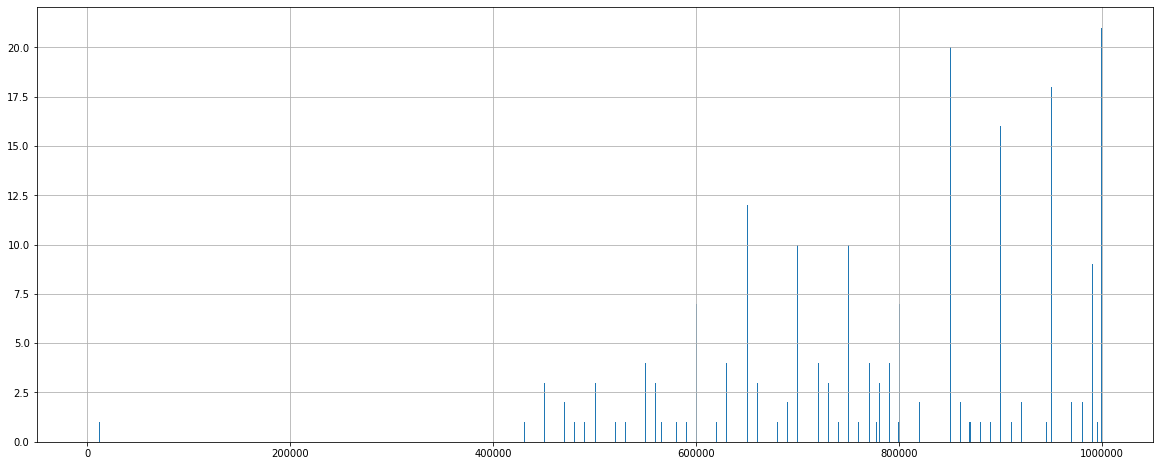

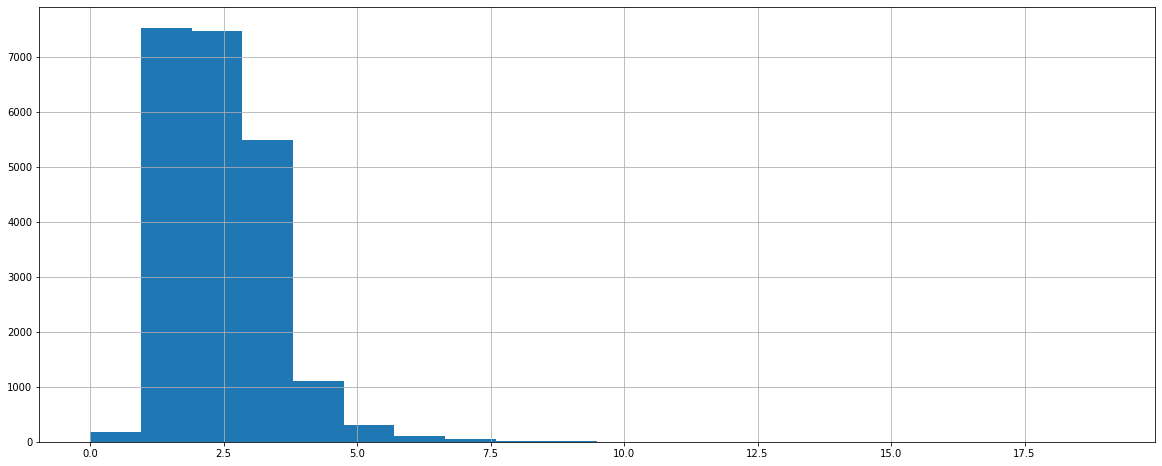

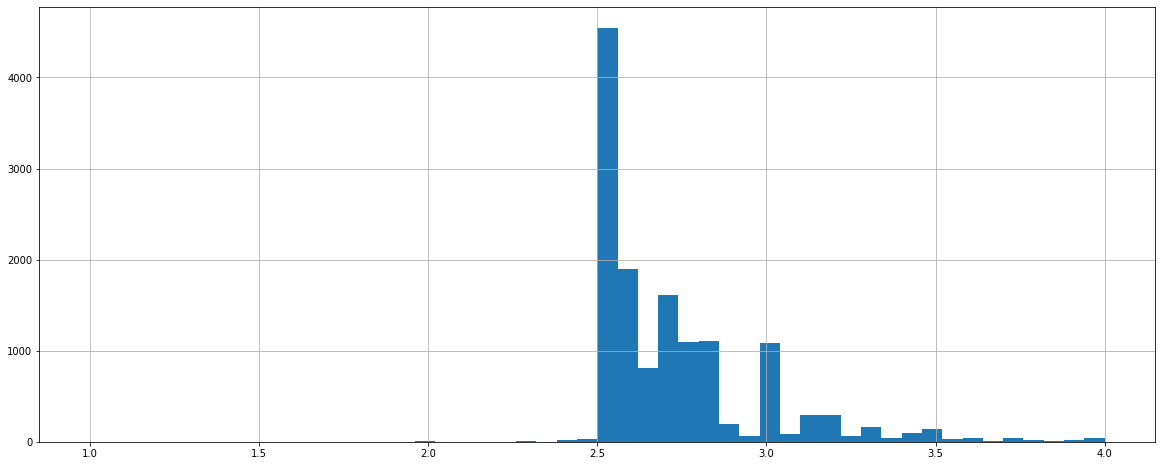

In [75]:
print("Квартир дешевле миллиона:", data[data['last_price']<1000000]['last_price'].count())

print("Квартир, где ноль комнат:",data[data['rooms']<1]['rooms'].count())

print("Квартир с потолком ниже 2.2 м:",data[(data["ceiling_height"]<2.2) &(data["ceiling_height"]>0)]["ceiling_height"].count())



#data[data['last_price']<1000000]['last_price'].hist(bins = 1000,figsize = (20,8))

data['last_price'].hist(bins=1000, range=(0, 1000000),figsize = (20,8))
plt.show()

data['rooms'].hist(bins=20, range=(0, 19),figsize = (20,8))
plt.show()

data["ceiling_height"].hist(bins=50, range=(1, 4),figsize = (20,8))
plt.show()

По гистограммам видно, что квартир дешевле миллиона довольно много, но есть группа, которая сильно выделяется от остальных и находится ближе к нулю. Скорее всего, там цена указана в долларах. Касательно квартир с низким потолком - с ними лучше будет поступить так: обнулить эту величину и не учитывать в расчётах. Касательно нуля комнат - лучше просто выкинуть эти данные, благо их не так много.

In [76]:
data.loc[data['last_price']<100000,'last_price'] = data.loc[data['last_price']<100000,'last_price']*70 
# Перевели цену в долларах в рубли

data.loc[(data["ceiling_height"]<2.2) | (data["ceiling_height"]>10),"ceiling_height"] =0 
# избавились от неправильной высоты у потолков

data.drop(labels = data[data['rooms']==0].index,axis = 'index',inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22052 entries, 0 to 23698
Data columns (total 31 columns):
total_images            22052 non-null int64
last_price              22052 non-null float64
total_area              22052 non-null float64
first_day_exposition    22052 non-null datetime64[ns]
rooms                   22052 non-null int64
ceiling_height          22052 non-null float64
floors_total            22052 non-null int64
living_area             22052 non-null float64
floor                   22052 non-null int64
is_apartment            22052 non-null bool
studio                  22052 non-null bool
open_plan               22052 non-null bool
kitchen_area            22052 non-null float64
balcony                 22052 non-null int64
locality_name           22052 non-null object
airports_nearest        22052 non-null float64
cityCenters_nearest     22052 non-null float64
parks_around3000        22052 non-null int64
parks_nearest           22052 non-null float64
ponds_around3

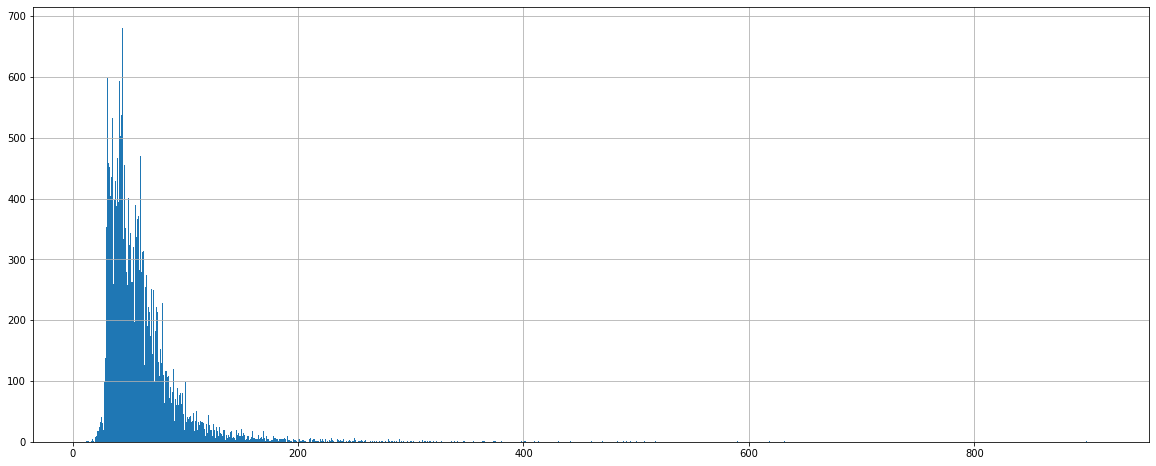

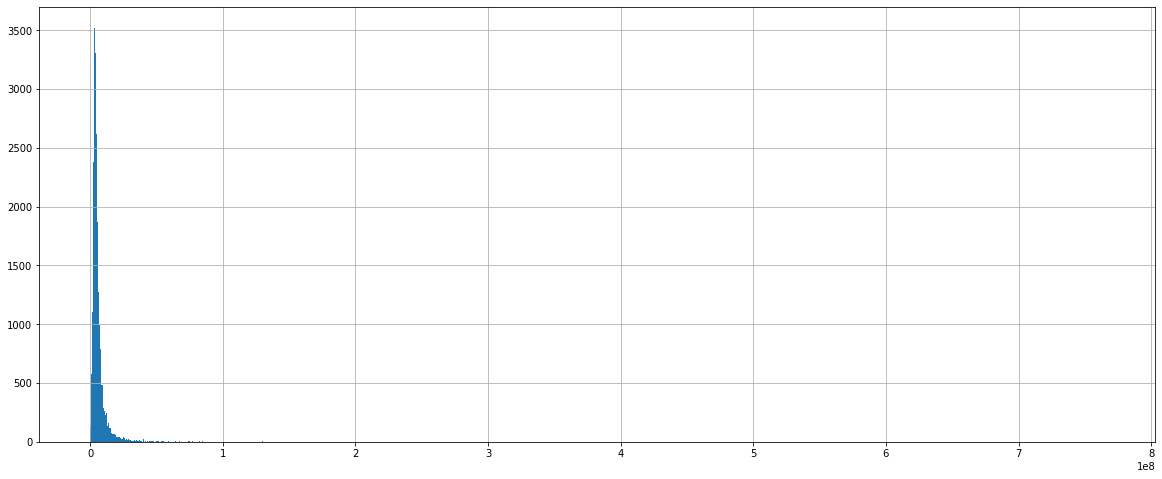

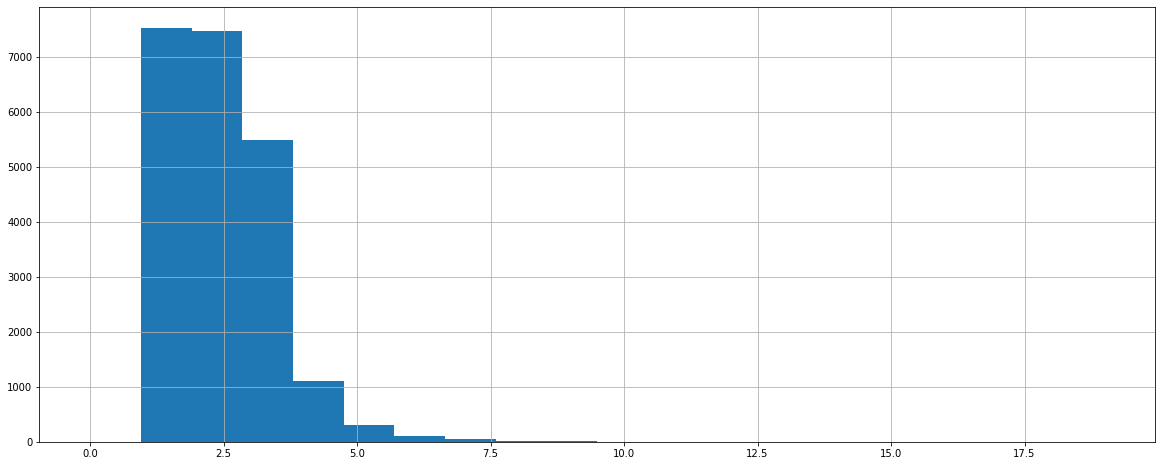

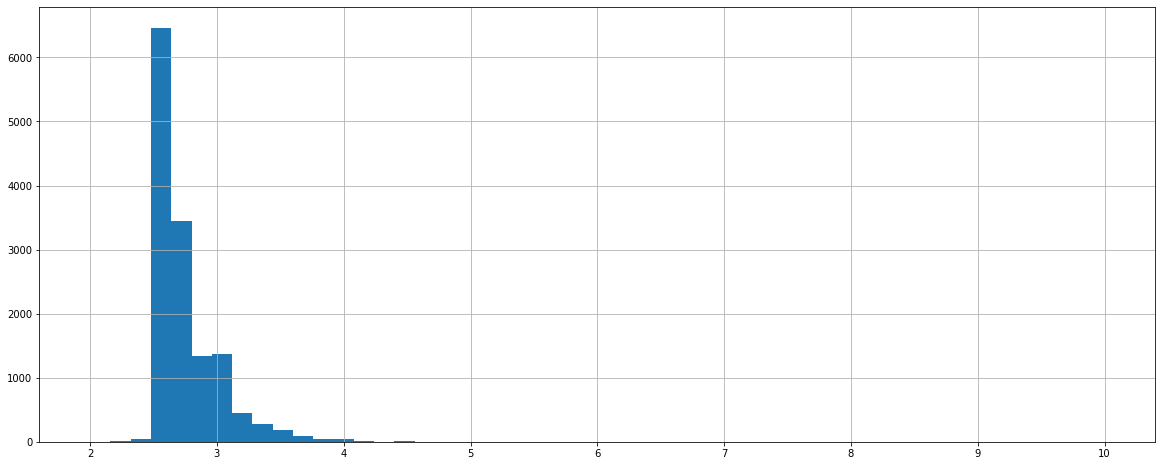

In [77]:
# Теперь можем посторить гистограммы для каждого параметра 

data['total_area'].hist(bins=1000, range=(10, 910),figsize = (20,8))
plt.show()

data['last_price'].hist(bins=1000, range=(100000, 765000000),figsize = (20,8))
plt.show()

data['rooms'].hist(bins=20, range=(0, 19),figsize = (20,8))
plt.show()

data["ceiling_height"].hist(bins=50, range=(2, 10),figsize = (20,8))
plt.show()

Из гистограмм видно, что большая часть квартир имеют примерно одинаковый диапозон параметров, а широкий диапозон минимального и максимального значения вызван малым количеством объявлений с крайне нестандартными параметрами. Поэтому для более подробного анализа нужно либо исключить эти предложения, либо использовать иные графики, либо воспользоваться категоризацией.

Среднее время продажи квартиры 185.47830893966517 дней
Медиана времени продажи квартиры 102.0 дней


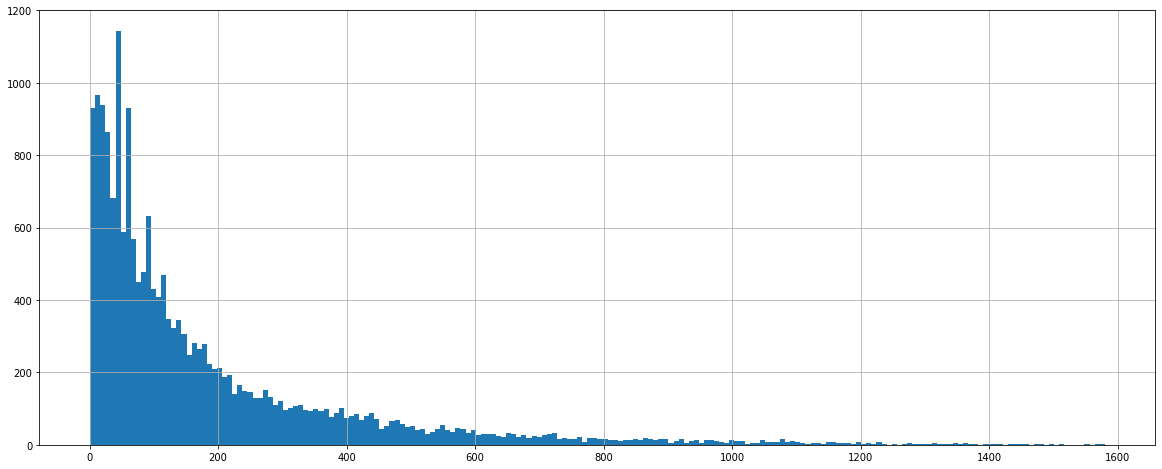

In [78]:
# Теперь подробнее изучим время продажи квартиры. Помним, что мы заменили часть данных нулями в том случае, если
# объявление всё ещё не убрано

print("Среднее время продажи квартиры", data[data["days_exposition"]!=0]["days_exposition"].mean(), "дней")

print("Медиана времени продажи квартиры", data[data["days_exposition"]!=0]["days_exposition"].median(), "дней")

data[data["days_exposition"]!=0]["days_exposition"].hist(bins = 200, figsize = (20,8))



Видим, что большая часть квартир продаётся около полугода. Интересно посмотреть, сколько квартир продаётся более двух лет и меньше недели. Исходя из гистограммы, среднее значение слишком завышено за счёт аномально долгих продаж. Поэтому, было бы неплохо не учитывать 1-2% самых долгих и самых быстрых продаж. 

Аномально долгих продаж 715 дней
Аномально быстрых продаж 586 дней
Аномально долгих продаж 325 дней
Аномально быстрых продаж 326 дней
Среднее время продажи квартиры 171.94308455541625 дней
Медиана времени продажи квартиры 102.0 дней


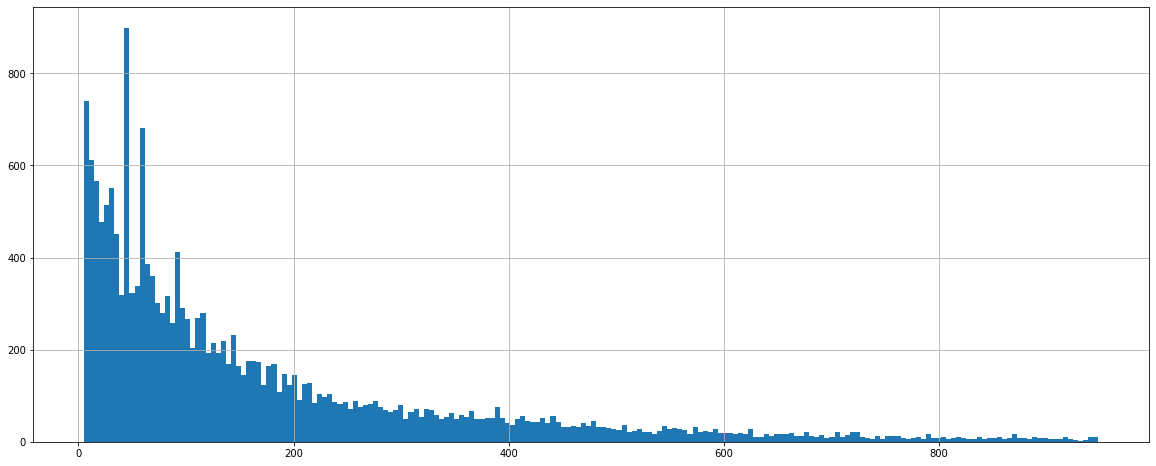

In [79]:
# считаем количество продаж дольше двух лет и меньше недели

print("Аномально долгих продаж", data[data["days_exposition"]>730]["days_exposition"].count(), "дней")

print("Аномально быстрых продаж", data[(data["days_exposition"]!=0) & (data["days_exposition"]<7) ]["days_exposition"].count(), "дней")

# изменим диапазон, чтобы кол-во значений не превышало 1-2%

print("Аномально долгих продаж", data[data["days_exposition"]>950]["days_exposition"].count(), "дней")

print("Аномально быстрых продаж", data[(data["days_exposition"]!=0) & (data["days_exposition"]<5) ]["days_exposition"].count(), "дней")

# Пометим эти данные как аномальные

data.loc[data["days_exposition"]>950,"days_exposition"]=0

data.loc[(data["days_exposition"]!=0) & (data["days_exposition"]<5),"days_exposition"]=0

# Посчитаем новые значения для среднего и медианы, хотя последняя врятли сильно изменится 

print("Среднее время продажи квартиры", data[data["days_exposition"]!=0]["days_exposition"].mean(), "дней")

print("Медиана времени продажи квартиры", data[data["days_exposition"]!=0]["days_exposition"].median(), "дней")

# Похоже, цифры не сильно изменились. Можно считать, что это достаточно отчищенная информация

data[data["days_exposition"]!=0]["days_exposition"].hist(bins = 200, figsize = (20,8))

Было бы логично предположить, что считать что долго или быстро - это определённый процент от общего числа. Пусть эта величина будет равна 10%. Тогда найдём границы значений для 10% (примерно 2000 сделок)

In [80]:
print("Быстрых продаж", data[data["days_exposition"]>425]["days_exposition"].count())

print("Долгих продаж", data[(data["days_exposition"]!=0) & (data["days_exposition"]<21) ]["days_exposition"].count())

Быстрых продаж 1949
Долгих продаж 2054


Считаем, что продажа квартиры за 3 недели - это быстрая продажа. Если же продажа больше 14 месяцев - это долгая продажа. 

Теперь приступим к изучению влияния различных факторов на цену квартиры. Зависит ли цена от площади, числа комнат, этажа (первого или последнего), удалённости от центра, от даты размещения: дня недели, месяца и года.

In [81]:
# Для начала можем вычислить коэффициенты корреляции Пирсона

print("Корреляция между ценой и площадью ", data[data['last_price']<100000000]['last_price'].corr(data['total_area']))

print("Корреляция между ценой и комнатами ", data[data['last_price']<100000000]['last_price'].corr(data[data['rooms']<11]['rooms']))

print("Корреляция между ценой и этажом ", data[data['last_price']<100000000]['last_price'].corr(data['which_floor']))

print("Корреляция между ценой и расстоянием от центра ", data[data['last_price']<100000000]['last_price'].corr(data[(data['last_price']<100000000)&(data['cityCenters_nearest']<1000000)]['cityCenters_nearest']))

print("Корреляция между ценой и годом ", data[data['last_price']<100000000]['last_price'].corr(data['Year']))

print("Корреляция между ценой и месяцем ", data[data['last_price']<100000000]['last_price'].corr(data['month']))

print("Корреляция между ценой и днём ", data[data['last_price']<100000000]['last_price'].corr(data['day_of_week']))

# для дополнительной информации найдём корреляцию между total_area и rooms

print("Корреляция между комнатами и площадью ", data['total_area'].corr(data['rooms']))

Корреляция между ценой и площадью  0.7702815123953847
Корреляция между ценой и комнатами  0.4755133280862293
Корреляция между ценой и этажом  0.06234936968080662
Корреляция между ценой и расстоянием от центра  -0.3013740032532193
Корреляция между ценой и годом  -0.05002675602784272
Корреляция между ценой и месяцем  0.004332053467859678
Корреляция между ценой и днём  -0.00489086675614308
Корреляция между комнатами и площадью  0.7666479504570611


Результаты довольно ожидаемы, цена квартиры зависит от площади, количества комнат (а они напрямую связаны с площадью) и не зависят от этажа, года, месяца и дня недели выставления на продажу. Меньшая зависимость наблюдается между расстоянием до центра города и ценой на квартиру. Построим графики для величин, у которых коэффициент корреляции больше 0.15 по модулю 

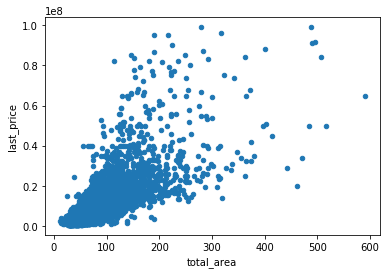

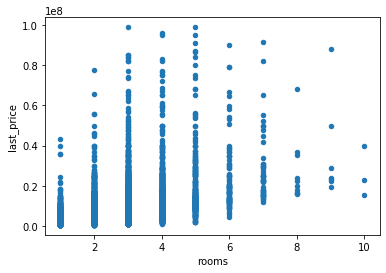

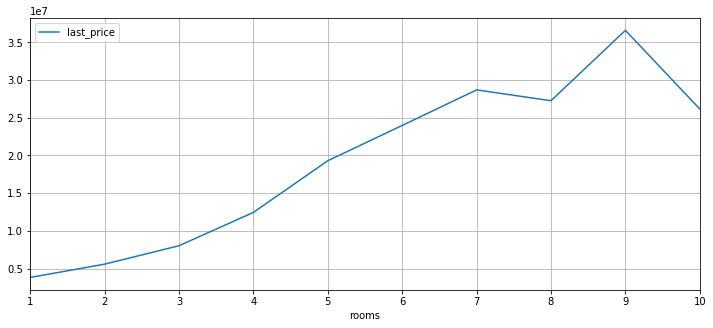

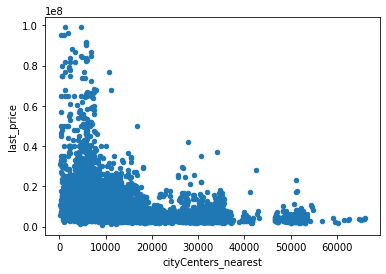

In [82]:
data[data['last_price']<100000000].plot(x='total_area', y='last_price', kind='scatter')

data[(data['last_price']<100000000)&(data['rooms']<11)].plot(x='rooms', y='last_price', kind='scatter')

# Как видим, такая диаграмма не подходит для оценки взаимосвязи между кол-вом комнат и ценой, используем другой метод

data[(data['last_price']<100000000)&(data['rooms']<11)].pivot_table(index='rooms', values='last_price',aggfunc = 'mean').plot(grid=True, figsize=(12, 5))

data[(data['last_price']<100000000)&(data['cityCenters_nearest']<1000000)].plot(x='cityCenters_nearest', y='last_price', kind='scatter')

Как видим из графиков, зависимости довольно очевидно прослеживаются в этих соотношениях. Значит можно утверждать, что цена на квартиру зависит от площади, числа комнат, расстояния от центра города, а от этажа, месяца года и дня публикации заявки не зависят. 

Перейдём к следующему этапу. Выберем 10 населённых пунктов с самым большим числом объявлений и посчитаем среднюю цену квадратного метра. Выведем населённые пункты с самой большой и малой ценой.

In [83]:
a = data.query('locality_name != "unknown"').pivot_table(index='locality_name', values='one_sq',aggfunc = ['mean','count']).sort_values(by = ('count', 'one_sq'),ascending = False)
    
print(a.head(10))

print(a.sort_values(by = ('mean', 'one_sq'),ascending = False))

                            mean  count
                          one_sq one_sq
locality_name                          
Санкт-Петербург    114410.998480  14749
посёлок Мурино      85557.566305    456
посёлок Шушары      78598.249213    406
Всеволожск          68873.630029    366
Пушкин             103384.836378    346
Колпино             75344.096345    328
посёлок Парголово   90507.927448    298
Гатчина             68684.401336    296
деревня Кудрово     92416.088563    251
Выборг              58242.714226    204
                                  mean  count
                                one_sq one_sq
locality_name                                
посёлок Репино           127678.571429      2
посёлок Лисий Нос        121616.221359      2
Зеленогорск              115122.799198     24
Санкт-Петербург          114410.998480  14749
деревня Бор              105539.261570      1
...                                ...    ...
деревня Малая Романовка   12724.550898      1
поселок Совхозный   

Теперь изучим так называемый "центр" Санкт-Петербурга, а именно постараемся определить его диапазон. 

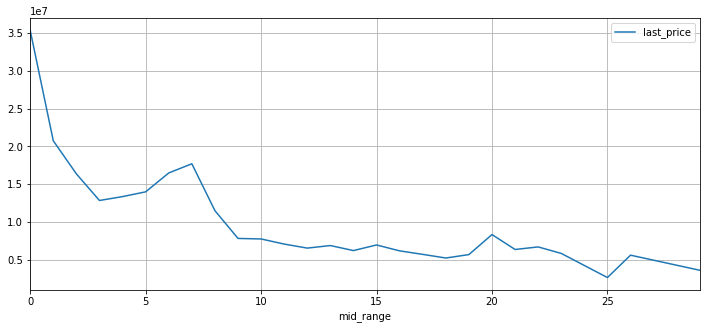

In [84]:
SP_data = data[data['locality_name']=='Санкт-Петербург'].copy() # сделаем копию части датасета для удобной работы

SP_data['mid_range']= round(SP_data['cityCenters_nearest']/1000) # создаём новый столбец

SP_data[(SP_data['last_price']<100000000)&(SP_data['mid_range']<50)&(SP_data['rooms']<10)&
        (SP_data["days_exposition"]<10)].pivot_table(index='mid_range', values='last_price',
                                                     aggfunc = 'mean').plot(grid=True, figsize=(12, 5))

На графике присутствуют несколько точек, которые можно прниять за границы центра - это примерно 3 км и 9 км. На графике есть некоторые скачки, посмотрим, сколько в каждом километре от центра было продано квартир.

In [85]:
print(SP_data['mid_range'].value_counts().sort_index(ascending = True))

0.0         26
1.0        181
2.0        291
3.0        333
4.0        650
5.0        863
6.0        553
7.0        388
8.0        568
9.0        556
10.0       682
11.0      1122
12.0      1519
13.0      1370
14.0      1210
15.0      1471
16.0      1172
17.0       813
18.0       247
19.0       153
20.0        47
21.0       106
22.0       191
23.0        76
24.0        24
25.0        24
26.0        51
27.0         2
28.0         7
29.0         6
1000.0      47
Name: mid_range, dtype: int64


В каждом километре, кроме нулевого, хватает данных для того, чтобы иметь уверенность в том, что какие-то аномалии не могут испортить всю картину. Построим график без нулевого километра.

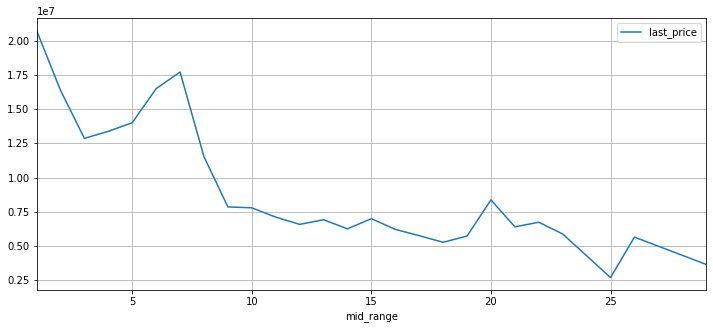

In [94]:
SP_data[(SP_data['last_price']<100000000)&(SP_data['mid_range']<50)&(SP_data['rooms']<10)&
        (SP_data["days_exposition"]<10)&(SP_data['mid_range']>0)].pivot_table(index='mid_range', values='last_price',
                                                     aggfunc = 'mean').plot(grid=True, figsize=(12, 5))


Теперь легче сделать вывод о том, что примерный радиус центра города - 9 км.

Теперь займёмся исследованием квартир в центре города. Нас интересуют такие вещи, как площадь, цена, число комнат, высота потолков, а также такие факторы, как число комнат, этаж, удалённость от центра, дата размещения объявления. Определим, насколько сильно данные факторы влияют на цену квартиры, и отличается ли их влияние от влияния факторов во всём городе.

In [87]:
SP_mid_data = SP_data[SP_data['mid_range']<=9].copy()

display(SP_mid_data)



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchensize,livingsize,one_sq,Year,month,day_of_week,which_floor,liv/all,kit/all,mid_range
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,большая,больше средней,100000.000000,2018,6,1,0,0.320000,0.410000,8.0
24,8,6500000.0,97.20,2015-10-31,2,0.00,3,46.5,1,False,...,большая,больше средней,66872.427984,2015,10,5,-1,0.478395,0.201646,2.0
35,6,15500000.0,149.00,2017-06-26,5,0.00,5,104.0,4,False,...,большая,большая,104026.845638,2017,6,0,0,0.697987,0.114094,4.0
51,7,45000000.0,161.00,2017-10-17,3,3.20,8,38.0,4,False,...,большая,больше средней,279503.105590,2017,10,1,0,0.236025,0.310559,7.0
52,20,11795000.0,136.00,2017-09-22,6,3.00,2,94.0,2,False,...,больше средней,большая,86727.941176,2017,9,4,1,0.691176,0.080882,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23674,10,5950000.0,56.00,2019-03-05,3,0.00,8,32.1,3,False,...,средняя,больше средней,106250.000000,2019,3,1,0,0.573214,0.151786,9.0
23681,13,5250000.0,43.00,2018-05-11,2,2.50,5,29.0,2,False,...,средняя,средняя,122093.023256,2018,5,4,0,0.674419,0.139535,7.0
23690,3,5500000.0,52.00,2018-07-19,2,0.00,5,31.0,2,False,...,средняя,больше средней,105769.230769,2018,7,3,0,0.596154,0.115385,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,больше средней,больше средней,129903.978052,2016,10,3,0,0.552812,0.145405,4.0


In [88]:
print("Максимальная площадь среди квартир", SP_mid_data['total_area'].max())

print("Минимальная площадь среди квартир", SP_mid_data['total_area'].min())

print("Средняя площадь квартир", SP_mid_data['total_area'].mean())

print("Медиана площади квартир", SP_mid_data['total_area'].median())

print("Максимальная цена среди квартир", SP_mid_data['last_price'].max())

print("Минимальная цена среди квартир", SP_mid_data['last_price'].min())

print("Средняя цена квартир", SP_mid_data['last_price'].mean())

print("Медиана цены квартир", SP_mid_data['last_price'].median())

print("Максимальное число комнат среди квартир", SP_mid_data['rooms'].max())

print("Минимальное число комнат среди квартир", SP_mid_data['rooms'].min())

print("Среднее число комнат квартир", SP_mid_data['rooms'].mean())

print("Медиана числа комнат квартир", SP_mid_data['rooms'].median())

print("Максимальная высота потолка среди квартир", SP_mid_data[SP_mid_data["ceiling_height"]!=0]['ceiling_height'].max())

print("Минимальная высота потолка комнат среди квартир", SP_mid_data[SP_mid_data["ceiling_height"]!=0]['ceiling_height'].min())

print("Средняя высота потолка комнат квартир", SP_mid_data[SP_mid_data["ceiling_height"]!=0]['ceiling_height'].mean())

print("Медиана высоты потолка комнат квартир", SP_mid_data[SP_mid_data["ceiling_height"]!=0]['ceiling_height'].median())

Максимальная площадь среди квартир 900.0
Минимальная площадь среди квартир 12.0
Средняя площадь квартир 86.40924472669539
Медиана площади квартир 73.0
Максимальная цена среди квартир 763000000.0
Минимальная цена среди квартир 853300.0
Средняя цена квартир 13205154.417101383
Медиана цены квартир 8500000.0
Максимальное число комнат среди квартир 19
Минимальное число комнат среди квартир 1
Среднее число комнат квартир 2.6947153549557723
Медиана числа комнат квартир 3.0
Максимальная высота потолка среди квартир 6.0
Минимальная высота потолка комнат среди квартир 2.4
Средняя высота потолка комнат квартир 3.020626489615253
Медиана высоты потолка комнат квартир 3.0


Видим, что показатели площади, цены, числа комнат и даже высоты потолков выше, чем в среднем по рынку, что выглядит довольно реалистично. Теперь же оценим факторы влияния по сравнению с другими квартирами в Санкт-Петербурге. 

In [90]:
print("Корреляция между ценой и комнатами ", SP_mid_data[SP_mid_data['last_price']<100000000]['last_price'].corr(SP_mid_data[SP_mid_data['rooms']<11]['rooms']))

print("Корреляция между ценой и этажом ", SP_mid_data[SP_mid_data['last_price']<100000000]['last_price'].corr(SP_mid_data['which_floor']))

print("Корреляция между ценой и расстоянием от центра ", SP_mid_data[SP_mid_data['last_price']<100000000]['last_price'].corr(SP_mid_data[(SP_mid_data['last_price']<100000000)]['mid_range']))

print("Корреляция между ценой и годом ", SP_mid_data[SP_mid_data['last_price']<100000000]['last_price'].corr(SP_mid_data['Year']))

print("Корреляция между ценой и месяцем ", SP_mid_data[SP_mid_data['last_price']<100000000]['last_price'].corr(SP_mid_data['month']))

print("Корреляция между ценой и днём ", SP_mid_data[SP_mid_data['last_price']<100000000]['last_price'].corr(SP_mid_data['day_of_week']))

Корреляция между ценой и комнатами  0.4540186632905733
Корреляция между ценой и этажом  0.09137293815934057
Корреляция между ценой и расстоянием от центра  -0.1772134916819227
Корреляция между ценой и годом  -0.06250351412747314
Корреляция между ценой и месяцем  0.009792929953469788
Корреляция между ценой и днём  0.01041518318139212


In [91]:
print("Корреляция между ценой и комнатами ", SP_data[SP_data['last_price']<100000000]['last_price'].corr(SP_data[SP_data['rooms']<11]['rooms']))

print("Корреляция между ценой и этажом ", SP_data[SP_data['last_price']<100000000]['last_price'].corr(SP_data['which_floor']))

print("Корреляция между ценой и расстоянием от центра ", SP_data[SP_data['last_price']<100000000]['last_price'].corr(SP_data[(SP_data['last_price']<100000000)]['mid_range']))

print("Корреляция между ценой и годом ", SP_data[SP_data['last_price']<100000000]['last_price'].corr(SP_data['Year']))

print("Корреляция между ценой и месяцем ", SP_data[SP_data['last_price']<100000000]['last_price'].corr(SP_data['month']))

print("Корреляция между ценой и днём ", SP_data[SP_data['last_price']<100000000]['last_price'].corr(SP_data['day_of_week']))

Корреляция между ценой и комнатами  0.4911057115593584
Корреляция между ценой и этажом  0.08094120203583156
Корреляция между ценой и расстоянием от центра  0.005763139412342654
Корреляция между ценой и годом  -0.05199583733778853
Корреляция между ценой и месяцем  0.0010113971198523913
Корреляция между ценой и днём  0.000445588710353311


Можем наблюдать следующие факты: Влияние большинства факторов совпадает для квартир в центре относительно всех квартир в городе, что в общем логично. Основным отличием является зависимость цены от расстояния до центра. В случае центра города, чем дальше от центра - тем больше цена. В случае всего города, такой зависимости не наблюдается по коэффициентом корреляции. Хотя по графику видна та же зависимость: дальше от центра - меньше стоимость. Также появилась более очевидная зависимость от этажа, квартиры на первых этажах стоят дешевле, чем на последних. Опять же, это вполне логично. 

На основании всего вышесказанного можно утверждать, что различия между квартирами в центре города и на окраинах в плане влияния факторов стоимости незначительны. 

## Общий вывод

На основании сделанных выше исследований можно сделать следующие выводы: 
    1) Основные показатели, которые определяют цену квартиры - её площадь, число комнат, а также расстояние от центра                  населённого пункта. 
    2) В меньшей степени влияет этаж квартиры, в центре города квартиры с последним этажом стоят в среднем немного дороже, чем        квартиры на первом 
    3) В центре города факторы цены квартиры не сильно отличаются от общих по городу за исключением расстояния до центра,              здесь имеется большее приращение цены к расстоянию до центра
    4) На основании анализа цены квартир было установлено, что примерный радиус центра города Санкт-Петербург равен 9 км
    
Также стоит отметить, что число комнат и площадь квартиры довольно сильно связаны, поэтому, по сути, это можно считать одним параметром. 

Касательно времени продажи квартиры - можно считать, что быстрая продажа - это быстрее трёх недель, а медленная - дольше 14 месяцев. В среднем квартира продаётся около 4 месяцев. 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод